# Prediction vine quality with neural net

We have data set wiht differenr vine characteristic and  quality

In [7]:
import pandas as pd
vine_data = pd.read_csv("winequality-red.csv", sep=";", header = 0)
print vine_data[:10]

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

In [8]:
import random
import matplotlib.pyplot as plt
import pybrain
from sklearn.preprocessing import normalize
from sklearn.cross_validation import train_test_split
import numpy as np
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules import SoftmaxLayer
from pybrain.utilities import percentError
from pybrain.datasets import ClassificationDataSet

with open('winequality-red.csv') as f:
    f.readline() # skip head line
    data = np.loadtxt(f, delimiter=';')
# import urllib # get data from url
# # URL for the Wine Quality Data Set (UCI Machine Learning Repository)
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
# f = urllib.urlopen(url)
# f.readline()  # skip head line
# data = np.loadtxt(f, delimiter=';')
print data[:10]

[[  7.40000000e+00   7.00000000e-01   0.00000000e+00   1.90000000e+00
    7.60000000e-02   1.10000000e+01   3.40000000e+01   9.97800000e-01
    3.51000000e+00   5.60000000e-01   9.40000000e+00   5.00000000e+00]
 [  7.80000000e+00   8.80000000e-01   0.00000000e+00   2.60000000e+00
    9.80000000e-02   2.50000000e+01   6.70000000e+01   9.96800000e-01
    3.20000000e+00   6.80000000e-01   9.80000000e+00   5.00000000e+00]
 [  7.80000000e+00   7.60000000e-01   4.00000000e-02   2.30000000e+00
    9.20000000e-02   1.50000000e+01   5.40000000e+01   9.97000000e-01
    3.26000000e+00   6.50000000e-01   9.80000000e+00   5.00000000e+00]
 [  1.12000000e+01   2.80000000e-01   5.60000000e-01   1.90000000e+00
    7.50000000e-02   1.70000000e+01   6.00000000e+01   9.98000000e-01
    3.16000000e+00   5.80000000e-01   9.80000000e+00   6.00000000e+00]
 [  7.40000000e+00   7.00000000e-01   0.00000000e+00   1.90000000e+00
    7.60000000e-02   1.10000000e+01   3.40000000e+01   9.97800000e-01
    3.51000000e+

Divide data to test and train.

There are 10 classes of vine, we will convert it to 3 classes

In [9]:
TRAIN_SIZE = 0.7 
y = data[:, -1]
# there are 10 classes of vine, we will convert it to 3 classes
np.place(y, y < 5, 5)
np.place(y, y > 7, 7)
# minus mininum value and save changes
y -= min(y)
X = data[:, :-1]
X = normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=0)
HIDDEN_NEURONS_NUM = 100 # number of neurons in hidden lvl
MAX_EPOCHS = 100 # max number of iterations algorythm of optimization param

Convert data to structure ClassificationDataSet (Specialized data set for classification data. Classes are to be numbered from 0 to nb_classes-1.)


In [12]:
# train data
ds_train = ClassificationDataSet(np.shape(X)[1], nb_classes=len(np.unique(y_train)))
print 'after classds', ds_train
# First arg is number of features np.shape(X)[1], 
# Second arg is number of classes len(np.unique(y_train)))
ds_train.setField('input', X_train) # add features
print 'after input', ds_train
ds_train.setField('target', y_train[:, np.newaxis]) # add target column; np.newaxis creates vector
print 'after target', ds_train
ds_train._convertToOneOfMany( ) # 1 target column becomes 3 binar columns
print 'after convert', ds_train
# test data
ds_test = ClassificationDataSet(np.shape(X)[1], nb_classes=len(np.unique(y_train)))
ds_test.setField('input', X_test)
ds_test.setField('target', y_test[:, np.newaxis])
ds_test._convertToOneOfMany( ) 

np.random.seed(0)

after classds input: dim(0, 11)
[]

target: dim(0, 1)
[]

class: dim(0, 1)
[]


after input input: dim(1119, 11)
[[ 0.06368128  0.00362835  0.00214739 ...,  0.02169606  0.0146615
   0.07256704]
 [ 0.0690765   0.00155422  0.00319479 ...,  0.02495388  0.00379921
   0.10965894]
 [ 0.14622821  0.01440778  0.         ...,  0.0731141   0.01591307
   0.20859024]
 ..., 
 [ 0.09790929  0.00706434  0.00384201 ...,  0.04077488  0.00855157
   0.11773902]
 [ 0.25462776  0.00920577  0.00959751 ...,  0.06463628  0.01331899
   0.24875174]
 [ 0.06256963  0.00625696  0.00204309 ...,  0.02075013  0.00306464
   0.06001577]]

target: dim(0, 1)
[]

class: dim(0, 1)
[]


after target input: dim(1119, 11)
[[ 0.06368128  0.00362835  0.00214739 ...,  0.02169606  0.0146615
   0.07256704]
 [ 0.0690765   0.00155422  0.00319479 ...,  0.02495388  0.00379921
   0.10965894]
 [ 0.14622821  0.01440778  0.         ...,  0.0731141   0.01591307
   0.20859024]
 ..., 
 [ 0.09790929  0.00706434  0.00384201 ...,  0.04077488  0

Feedforward network

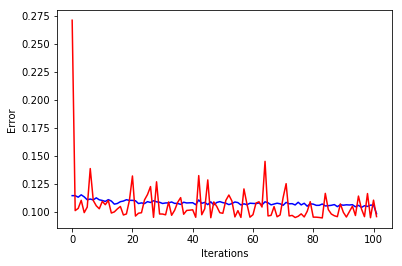

Error on train:  51.2957998213 %
Error on test:  47.2916666667 %


In [13]:

net = buildNetwork(ds_train.indim, HIDDEN_NEURONS_NUM, ds_train.outdim, outclass=SoftmaxLayer)
# ds.indim -- number of neurons for first (ently) layer (features quantity)
# ds.outdim -- number of neurons for last (exit) layer (number of classes)
# SoftmaxLayer -- activation function (for multiple classes classification)

init_params = np.random.random((len(net.params)))
net._setParameters(init_params)

np.random.seed(0)
# module of setup for pybrain use random
trainer = BackpropTrainer(net, dataset=ds_train) # Initializing module of optimization
err_train, err_val = trainer.trainUntilConvergence(maxEpochs=MAX_EPOCHS)
line_train = plt.plot(err_train, 'b', err_val, 'r')
xlab = plt.xlabel('Iterations')
ylab = plt.ylabel('Error')
plt.show()

res_train = net.activateOnDataset(ds_train).argmax(axis=1) # Count results from train data
print 'Error on train: ', percentError(res_train, ds_train['target'].argmax(axis=1)), '%' # error count
res_test = net.activateOnDataset(ds_test).argmax(axis=1) # ount results from trest data
print 'Error on test: ', percentError(res_test, ds_test['target'].argmax(axis=1)), '%' # error count

In [17]:
# Big difference between test and train means net has very high learning rate but in this case all looks fine.

50


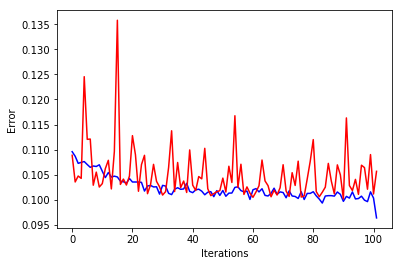

100


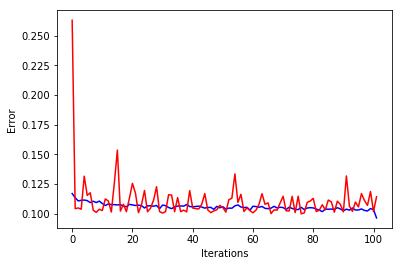

In [18]:
def plot_classification_error(hidden_neurons_num, res_train_vec, res_test_vec):
# hidden_neurons_num -- list with length h, contain amount of neurons that will be checked
# hidden_neurons_num = [50, 100, 200, 500, 700, 1000];
# res_train_vec -- list with length h, contain percentage of wrong results on train;
# res_test_vec -- list with length h, contain percentage of wrong results on test;
    plt.figure()
    plt.plot(hidden_neurons_num, res_train_vec)
    plt.plot(hidden_neurons_num, res_test_vec, '-r')
    plt.show()

#hidden_neurons_num = [50, 100, 200, 500, 700, 1000]
hidden_neurons_num = [50, 100]
res_train_vec = [[10]]
res_test_vec = [[10]]
####
for nnum in hidden_neurons_num:
	HIDDEN_NEURONS_NUM = nnum
	print HIDDEN_NEURONS_NUM
	np.random.seed(0)

# Feedforward network
	net = buildNetwork(ds_train.indim, HIDDEN_NEURONS_NUM, ds_train.outdim, outclass=SoftmaxLayer)
	init_params = np.random.random((len(net.params)))
	net._setParameters(init_params)

	random.seed(0)
	trainer = BackpropTrainer(net, dataset=ds_train) # Initializing module of optimization
	err_train, err_val = trainer.trainUntilConvergence(maxEpochs=MAX_EPOCHS)

    res_train = net.activateOnDataset(ds_train).argmax(axis=1) 
	res_test = net.activateOnDataset(ds_test).argmax(axis=1) 
	res_train_vec.append(err_train)
	res_test_vec.append(err_val)
	line_train = plt.plot(err_train, 'b', err_val, 'r')
	xlab = plt.xlabel('Iterations')
	ylab = plt.ylabel('Error')
	plt.show()
	
res_train_vec = res_train_vec[1:]
res_test_vec = res_test_vec[1:]